# Data Operations using Python and Pandas

### Using Python to prepare data for Machine Learning tasks and other data analysis

This notebook has been taken from the following link. Please follow that link to find more such notebooks on different topics.  
**Ref** : https://sebastianraschka.com/notebooks/python-notebooks.html

This notebook explores pandas and matplotlib (library for visualization) by analyzing a single dataset, and creating
multiple plots from them.  

It also has an optional section, that deals with normalization of data (optional).

# Sections

- [Installing Python packages](#Installing-Python-packages)

- [About the dataset](#About-the-dataset)

- [Downloading and saving CSV data files from the web](#Downloading-and-savin-CSV-data-files-from-the-web)

- [Reading in a dataset from a CSV file](#Reading-in-a-dataset-from-a-CSV-file)

- [Visualizating of a dataset](#Visualizating-of-a-data)

    - [Histograms](#Histograms)

    - [Scatterplots](#Scatterplots)

- [Splitting into training and test dataset](#Splitting-into-training-and-test-dataset)

- [Feature Scaling](#Feature-Scaling)

    - [Standardization](#Standardization)
    
    - [Min-Max scaling (Normalization)](#Min-Max-scaling-Normalization)

<br>
<br>

## Installing Python packages

[[back to top]](#Sections)

**In this section I want to recommend a way for installing the required Python-packages packages if you have not done so, yet. Otherwise you can skip this part.**

The packages we will be using in this tutorial are:

- [NumPy](http://www.numpy.org)
- [SciPy](http://www.scipy.org)
- [matplotlib](http://matplotlib.org)
- [scikit-learn](http://scikit-learn.org/stable/)

Although they can be installed step-by-step "manually", but I highly recommend you to take a look at the [Anaconda](https://store.continuum.io/cshop/anaconda/) Python distribution for scientific computing.

Anaconda is distributed by Continuum Analytics, but it is completely free and includes more than 195+ packages for science and data analysis as of today.
The installation procedure is nicely summarized here: http://docs.continuum.io/anaconda/install.html

If this is too much, the [Miniconda](http://conda.pydata.org/miniconda.html) might be right for you. Miniconda is basically just a Python distribution with the Conda package manager, which let's us install a list of Python packages into a specified `conda` environment from the Shell terminal, e.g.,

<pre>$[bash]> conda create -n myenv python=3
$[bash]> source activate myenv
$[bash]> conda install -n myenv numpy scipy matplotlib scikit-learn</pre>

When we start "python" in your current shell session now, it will use the Python distribution in the virtual environment "myenv" that we have just created. To un-attach the virtual environment, you can just use
<pre>$[bash]> source deactivate myenv</pre>

**Note:** environments will be created in ROOT_DIR/envs by default, you can use the `-p` instead of the `-n` flag in the conda commands above in order to specify a custom path.

**I find this procedure very convenient, especially if you are working with different distributions and versions of Python with different modules and packages installed and it is extremely useful for testing your own modules.**

<br>
<br>

## About the dataset

[[back to top]](#Sections)

For the following tutorial, we will be working with the free "Wine" Dataset that is deposited on the UCI machine learning repository  
(http://archive.ics.uci.edu/ml/datasets/Wine).

<br>

<font size="1">
**Reference:**  
Forina, M. et al, PARVUS - An Extendible Package for Data
Exploration, Classification and Correlation. Institute of Pharmaceutical
and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

</font>

<br>
<br>

The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to the following 13 attributes (features):

1) Alcohol  
2) Malic acid  
3) Ash  
4) Alcalinity of ash    
5) Magnesium  
6) Total phenols  
7) Flavanoids  
8) Nonflavanoid phenols  
9) Proanthocyanins  
10) Color intensity  
11) Hue  
12) OD280/OD315 of diluted wines  
13) Proline     

An excerpt from the wine_data.csv dataset:
    
<pre>1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
[...]
2,12.37,.94,1.36,10.6,88,1.98,.57,.28,.42,1.95,1.05,1.82,520
2,12.33,1.1,2.28,16,101,2.05,1.09,.63,.41,3.27,1.25,1.67,680
[...]
3,12.86,1.35,2.32,18,122,1.51,1.25,.21,.94,4.1,.76,1.29,630
3,12.88,2.99,2.4,20,104,1.3,1.22,.24,.83,5.4,.74,1.42,530</pre>

<br>
<br>

## Downloading and saving CSV data files from the web

[[back to top]](#Sections)

Usually, we have our data stored locally on our disk in as a common text (or CSV) file with comma-, tab-, or whitespace-separated rows. Below is just an example for how you can CSV datafile from a HTML website directly into Python and optionally save it locally.

In [1]:
import csv
import urllib

url = 'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv'
csv_cont = urllib.request.urlopen(url)
csv_cont = csv_cont.read() #.decode('utf-8')

# Optional: saving the data to your local drive
with open('./wine_data.csv', 'wb') as out:
    out.write(csv_cont)

**Note:** If you'd rather like to work with the data directly in `str`ing format, you could just apply the `.decode('utf-8')` method to the data that was read in byte-format by default.


<br>
<br>

## Reading in a dataset from a CSV file

[[back to top]](#Sections)

Since it is quite typical to have the input data stored locally, as mentioned above, we will use the [`numpy.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) function  now to read in the data from the CSV file.  
(alternatively [`np.genfromtxt()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) could be used in similar way, it provides some additional options)

In [2]:
import numpy as np

# reading in all data into a NumPy array
all_data = np.loadtxt(open("./wine_data.csv","r"),
        delimiter=",", 
        skiprows=0, 
        dtype=np.float64
        )

# load class labels from column 1
y_wine = all_data[:,0]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)

# load the 14 features
X_wine = all_data[:,1:]

# printing some general information about the data
print('\ntotal number of samples (rows):', X_wine.shape[0])
print('total number of features (columns):', X_wine.shape[1])

# printing the 1st wine sample
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})
print('\n1st sample (i.e., 1st row):\nClass label: {:d}\n{:}\n'
          .format(int(y_wine[0]), X_wine[0]))

# printing the rel.frequency of the class labels
print('Class label frequencies')
print('Class 1 samples: {:.2%}'.format(list(y_wine).count(1)/y_wine.shape[0]))
print('Class 2 samples: {:.2%}'.format(list(y_wine).count(2)/y_wine.shape[0]))
print('Class 3 samples: {:.2%}'.format(list(y_wine).count(3)/y_wine.shape[0]))


total number of samples (rows): 178
total number of features (columns): 13

1st sample (i.e., 1st row):
Class label: 1
[14.23 1.71 2.43 15.60 127.00 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065.00]

Class label frequencies
Class 1 samples: 33.15%
Class 2 samples: 39.89%
Class 3 samples: 26.97%


<br>
<br>

## Visualizating of a dataset

[[back to top]](#Sections)

There are endless way to visualize datasets for get an initial idea of how the data looks like. The most common ones are probably histograms and scatter plots.

### Histograms

[[back to top]](#Sections)

Histograms are a useful data to explore the distribution of each feature across the different classes. This could provide us with intuitive insights which features have a good and not-so-good inter-class separation. Below, we will plot a sample histogram for the "Alcohol content" feature for the three wine classes.

In [3]:
%matplotlib inline

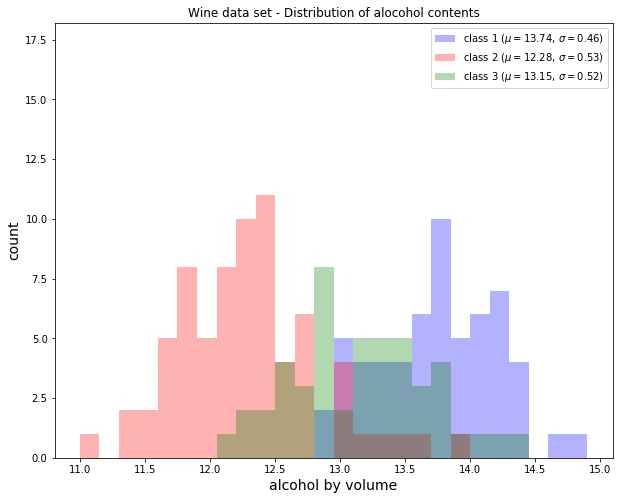

In [4]:
from matplotlib import pyplot as plt
from math import floor, ceil # for rounding up and down

plt.figure(figsize=(10,8))

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X_wine[:,0])), ceil(max(X_wine[:,0])), 0.15)

# get the max count for a particular bin for all classes combined
max_bin = max(np.histogram(X_wine[:,0], bins=bins)[0])

# the order of the colors for each histogram
colors = ('blue', 'red', 'green')

for label,color in zip(
        range(1,4), colors):

    mean = np.mean(X_wine[:,0][y_wine == label]) # class sample mean
    stdev = np.std(X_wine[:,0][y_wine == label]) # class standard deviation
    plt.hist(X_wine[:,0][y_wine == label], 
             bins=bins, 
             alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color)

plt.ylim([0, max_bin*1.3])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

<br>
<br>

### Scatterplots

[[back to top]](#Sections)

Scatter plots are useful for visualizing features in more than just one dimension, for example to get a feeling for the correlation between particular features.  
Unfortunately, we can't plot all 13 features here at once, since the visual cortex of us humans is limited to a maximum of three dimensions.

Below, we will create an example 2D-Scatter plot from the features "Alcohol content" and "Malic acid content".  
Additionally, we will use the [`scipy.stats.pearsonr`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) function to calculate a Pearson correlation coefficient between these two features.


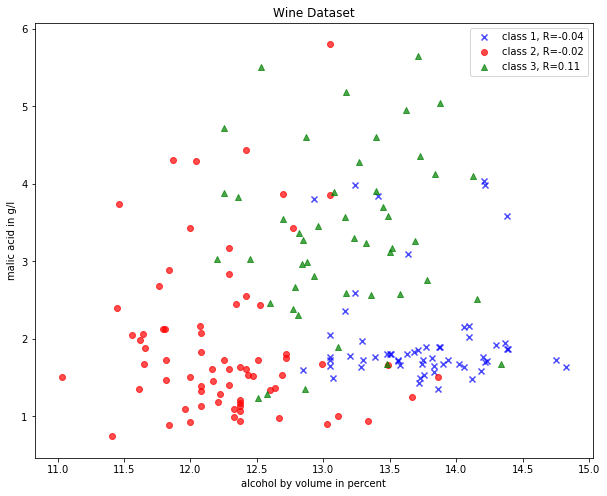

In [5]:
from scipy.stats import pearsonr

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    # Calculate Pearson correlation coefficient
    R = pearsonr(X_wine[:,0][y_wine == label], X_wine[:,1][y_wine == label])
    plt.scatter(x=X_wine[:,0][y_wine == label], # x-axis: feat. from col. 1
                y=X_wine[:,1][y_wine == label], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7, 
                label='class {:}, R={:.2f}'.format(label, R[0]) # label for the legend
                )
    
plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()

<br>
<br>

If we want to pack 3 different features into one scatter plot at once, we can also do the same thing in 3D:

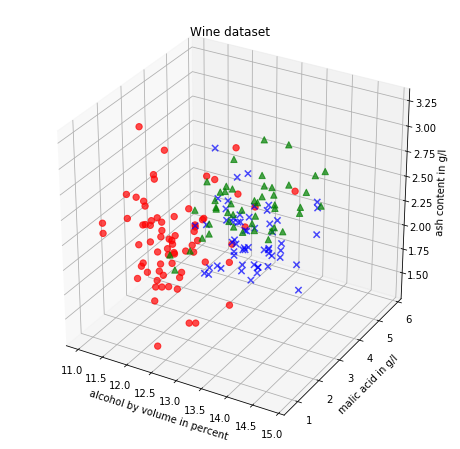

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):
    
    ax.scatter(X_wine[:,0][y_wine == label], 
               X_wine[:,1][y_wine == label], 
               X_wine[:,2][y_wine == label],  
               marker=marker, 
               color=color, 
               s=40, 
               alpha=0.7,
               label='class {}'.format(label))

ax.set_xlabel('alcohol by volume in percent')
ax.set_ylabel('malic acid in g/l')
ax.set_zlabel('ash content in g/l')

plt.title('Wine dataset')
     
plt.show()

<br>
<br>

## Splitting into training and test dataset 

[[back to top]](#Sections)

It is a typical procedure for machine learning and pattern classification tasks to split one dataset into two: a training dataset and a test dataset.  
The training dataset is henceforth used to train our algorithms or classifier, and the test dataset is a way to validate the outcome quite objectively before we apply it to "new, real world data".

Here, we will split the dataset randomly so that 70% of the total dataset will become our training dataset, and 30% will become our test dataset, respectively.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
     test_size=0.30, random_state=123)

Note that since this a random assignment, the original relative frequencies for each class label are not maintained.

In [9]:
print('Class label frequencies')
        
print('\nTraining Dataset:')    
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))
    
print('\nTest Dataset:')     
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 1 samples: 36.29%
Class 2 samples: 42.74%
Class 3 samples: 20.97%

Test Dataset:
Class 1 samples: 25.93%
Class 2 samples: 33.33%
Class 3 samples: 40.74%


<br>
<br>

# Optional Section

## Feature Scaling

[[back to top]](#Sections)

### Standardization

Another important procedure is to standardize the data prior to fitting the model and other analyses so that the features will have the properties of a standard normal distribution with   

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is especially important if we are comparing measurements that have different units, e.g., in our "wine data" example, where the alcohol content is measured in volume percent, and the malic acid content in g/l. 

In [10]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

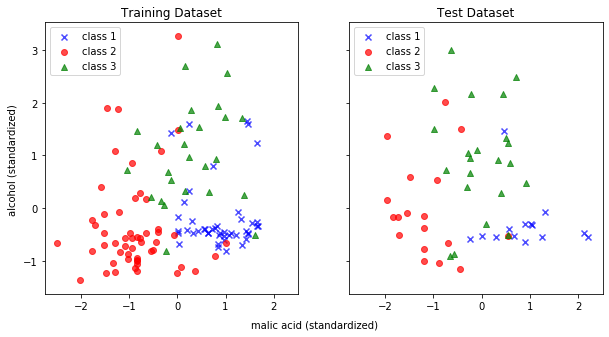

In [11]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

for a,x_dat, y_lab in zip(ax, (X_train, X_test), (y_train, y_test)):

    for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

        a.scatter(x=x_dat[:,0][y_lab == label], 
                y=x_dat[:,1][y_lab == label], 
                marker=marker, 
                color=color,   
                alpha=0.7,   
                label='class {}'.format(label)
                )

    a.legend(loc='upper left')

ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (standardized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (standardized)', ha='center', va='center', rotation='vertical')

plt.show()

<br>
<br>

<a id='Min-Max-scaling-Normalization'></a>

### Min-Max scaling (Normalization)

[[back to top]](#Sections)

An alternative approach to standardization is the so-called Min-Max scaling (sometimes also referred to as "normalization").  
In this approach, the data is scaled to a fixed range - usually 0 to 1.  
The cost of having this bounded range - in contrast to standardization - is that we will end up with small standard deviations, for example in the case where outliers are present.

The equation to calculate the "normalized" score is:

\begin{equation} X' = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

In [12]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_minmax = minmax_scale.transform(X_train)
X_test_minmax = minmax_scale.transform(X_test)

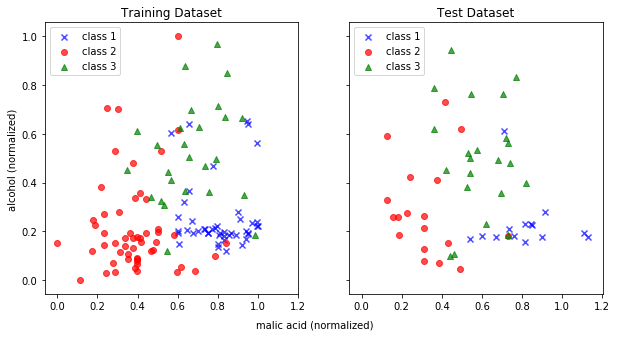

In [13]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

for a,x_dat, y_lab in zip(ax, (X_train_minmax, X_test_minmax), (y_train, y_test)):

    for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

        a.scatter(x=x_dat[:,0][y_lab == label], 
                y=x_dat[:,1][y_lab == label], 
                marker=marker, 
                color=color,   
                alpha=0.7,   
                label='class {}'.format(label)
                )

    a.legend(loc='upper left')

ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (normalized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (normalized)', ha='center', va='center', rotation='vertical')

plt.show()